In [1]:
import os
import pandas as pd
import matplotlib.lines as mlines
from df_utils import create_df, create_sparse_df_tracking
from plot_utils import plot_distance_to_target, plot_time_inside_target, plot_deviation_count

In [2]:
effort_models = ["zero_effort", "dc_effort_w1", "jac_effort_w1", "ctc_effort_w1", "armmovementpaper_effort"]
distances = ["dist", "exp_dist", "quadratic_dist"]
boni = ["hit_bonus","no_bonus"]

colors = {
    'dist': 'r', 
    'zero': 'g' 
}
legend_handles = [
    mlines.Line2D([0], [0], color=colors['dist'], lw=4, label='absolute distance'),
    mlines.Line2D([0], [0], color=colors['zero'], lw=4, label='no distance'),
    mlines.Line2D([0], [0], marker='o', color='black', markersize=8, label='with bonus', lw=0),
    mlines.Line2D([0], [0], marker='+', color='black', markersize=8, label='without bonus', lw=0)
]
markers = {"no_bonus": "+", "hit_bonus": "o"}

In [3]:
folder = os.path.abspath(f"../../simulators/")
sparse_df = create_sparse_df_tracking(effort_models)
data_df, number_of_episodes = create_df(boni, ["zero_effort"], ["dist"], folder, run_nr=1, task = "tracking")

all_combined_df = pd.concat([sparse_df, data_df])

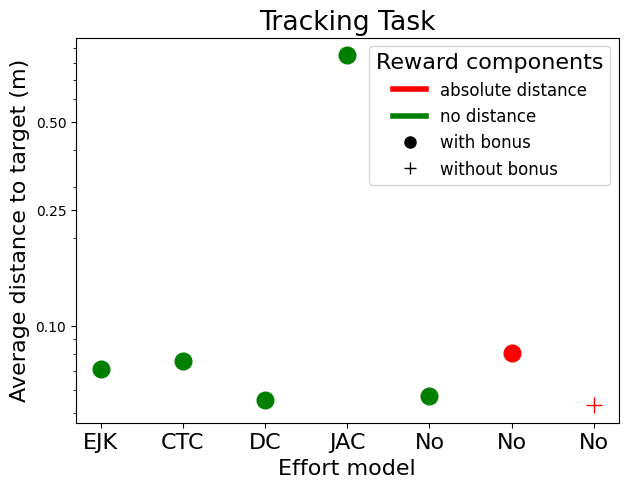

In [5]:
plot_distance_to_target('tracking','Reward components',"distance_tracking", legend_handles, colors, markers, all_combined_df)

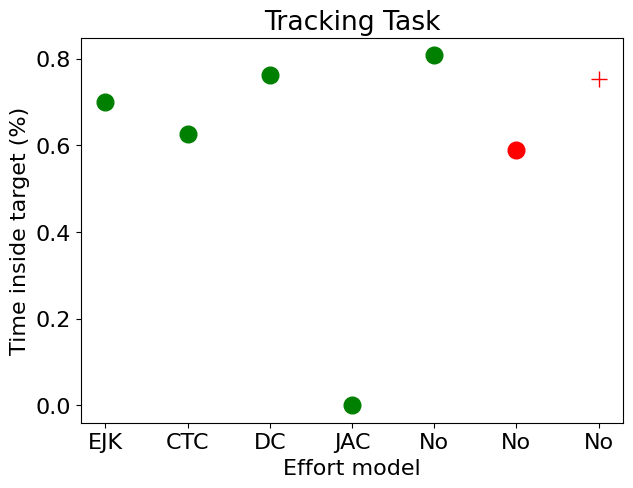

In [8]:
plot_time_inside_target('tracking','time_tracking', colors, markers, all_combined_df)

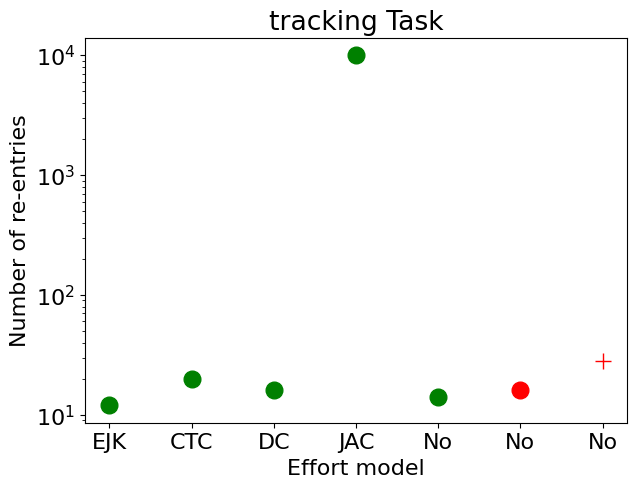

In [9]:
plot_deviation_count('tracking','deviation_count_tracking', colors, markers, all_combined_df)